In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [4]:
 SD=pd.read_csv('Social_Network_Ads (1).csv')

In [5]:
SD

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
 #preprocessing
 from sklearn.preprocessing import LabelEncoder
 le=LabelEncoder()

In [9]:
 SD['Gender']=le.fit_transform(kd['Gender'])

In [10]:
SD

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [11]:
 #data cleaning
 SD.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
 #dat split
 x=SD[['Gender','Age','EstimatedSalary']]
 x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [13]:
 y=SD[['Purchased']]
 y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [14]:
 from sklearn.model_selection import train_test_split
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [15]:
 #transformation
 sc=StandardScaler()
 x_train=sc.fit_transform(x_train)
 x_test=sc.transform(x_test)

In [16]:
 from sklearn import linear_model

In [17]:
 model=linear_model.LogisticRegression()

In [18]:
 model.fit(x_train,y_train)

C:\Users\WINDOWS 10\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [19]:
 y_pred=model.predict(x_test)

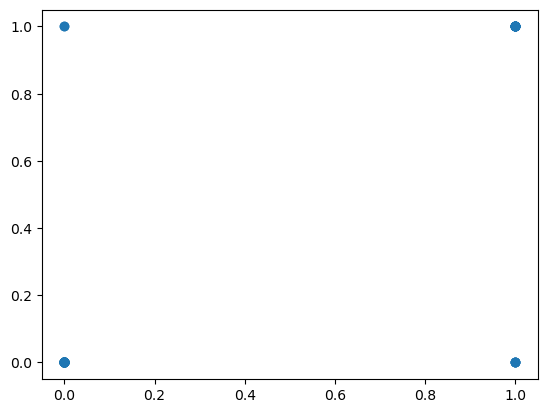

In [20]:
 plt.scatter(y_test,y_pred)

In [21]:
 #confusion matrics
 from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [22]:
 cm=confusion_matrix(y_test,y_pred)

In [23]:
print(cm)

[[56  2]
 [ 5 17]]


In [24]:
 TN=cm[0][0]
 TP=cm[1][1]
 FN=cm[1][0]
 FP=cm[0][1]
 print(f"TP: {TP}")
 print(f"TN: {TN}")
 print(f"FP: {FP}")
 print(f"FN: {FN}")

TP: 17
TN: 56
FP: 2
FN: 5


In [28]:
 confuDisp=ConfusionMatrixDisplay(cm)

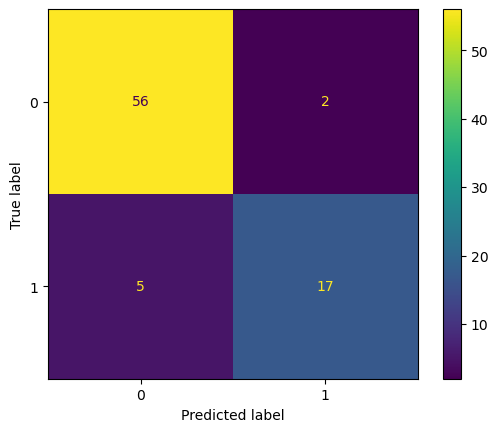

In [29]:
confuDisp.plot()

In [30]:
 #precision & Accuracy
 from sklearn.metrics import precision_score,accuracy_score

In [31]:
 print(accuracy_score (y_test,y_pred))

0.9125


In [32]:
 acc=(TP+TN)/(TP+TN+FP+FN)
 print(acc)

0.9125


In [33]:
 errorRate=1-acc
 print(errorRate)

0.08750000000000002


In [34]:
 prec=(TP)/(TP+FP)
 print(prec)

0.8947368421052632


In [36]:
Recall=(TP)/(TP+FN)
print(Recall)

0.7727272727272727
